# First Pass

Goal:  Obtain the 100 most frequent words in 5 of Shakespeare's comedies and 5 of his tragedies.  Get the percentages that these words occur in the genre

In [2]:
import stopwords

def filterWords(words):
    filtered_words = [w for w in words if w not in stopwords.eng_words]
    return filtered_words

In [3]:
import re

def createListOfWords(dir_name, plays):
    totalWordList = list()
    for play_name in plays:
        with open(dir_name + '/' + play_name) as f:
            text = re.sub('[^a-z\ \']+', " ",  f.read().lower())
            words = list(text.split())
            filtered_words = filterWords(words)
            totalWordList += filtered_words
    return totalWordList

In [4]:
import os

dir_name = "/Users/evelynting/Desktop/thesis/plays/comedy"
comedyPlays = [f for f in os.listdir(dir_name) ]
comedyWords = createListOfWords(dir_name, comedyPlays)

from nltk.probability import FreqDist
comedy = FreqDist(comedyWords)
common_comedy = comedy.most_common(100)

In [5]:
dir_name = "/Users/evelynting/Desktop/thesis/plays/tragedy"
tragedyPlays = [f for f in os.listdir(dir_name) ]
tragedyWords = createListOfWords(dir_name, tragedyPlays)

from nltk.probability import FreqDist
tragedy = FreqDist(tragedyWords)
common_tragedy = tragedy.most_common(100)

In [6]:
comedydict = dict()
totalComWordCount = len(comedyWords)
totalTragWordCount = len(tragedyWords)
for word in common_comedy:
    comedydict[word[0]] = word[1]/totalComWordCount   

In [9]:
import pandas as pd

comtragPairings = list()
for word in common_tragedy:
    key = word[0]
    if key in comedydict and abs(comedydict[key] - word[1]/totalTragWordCount) > 0.001:
        pairing = (key, comedydict[key]*100, word[1]/totalTragWordCount*100)
        comtragPairings.append(pairing)
df = pd.DataFrame(comtragPairings, columns = ("word", "percInComedy", "percInTragedy"))
df = df.set_index(["word"])
df

,percInComedy,percInTragedy
word,,
lord,0.289868,0.821196
thy,0.643419,0.804740
come,0.827880,0.691187
let,0.562168,0.687896
good,0.867407,0.684605
sir,0.865211,0.572698
well,0.676358,0.567761
would,0.700514,0.554596
tis,0.270104,0.510162


Potential Problem:  "Wife" occurs significantly more in comedy than tragedy.  However, "wife" doesn't show up in the dataframe above because it comprises such a small percent of comedy.

Perhaps, instead of finding pairs with significant difference through abs(comedyPercent - tragedyPercent) > 0.001, we can find significant pairs through abs(comedyPercent - tragedyPercent) / (comedyPercent + tragedyPercent) > 0.2

In [11]:
import pandas as pd

comtragPairings = list()
for word in common_tragedy:
    key = word[0]
    if key in comedydict:
        comPercent = comedydict[key]
        tragPercent = word[1]/totalTragWordCount
        if abs(comPercent-tragPercent)/(comPercent+tragPercent) > 0.2:
            pairing = (key, comedydict[key]*100, word[1]/totalTragWordCount*100)
            comtragPairings.append(pairing)
df = pd.DataFrame(comtragPairings, columns = ("word", "percInComedy", "percInTragedy"))
df = df.set_index(["word"])
df

,percInComedy,percInTragedy
word,,
lord,0.289868,0.821196
sir,0.865211,0.572698
tis,0.270104,0.510162
man,0.808116,0.432815
love,0.865211,0.427878
great,0.140542,0.260018
tell,0.353551,0.225459
pray,0.298652,0.185962
old,0.221793,0.146466


In [12]:
%matplotlib inline
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

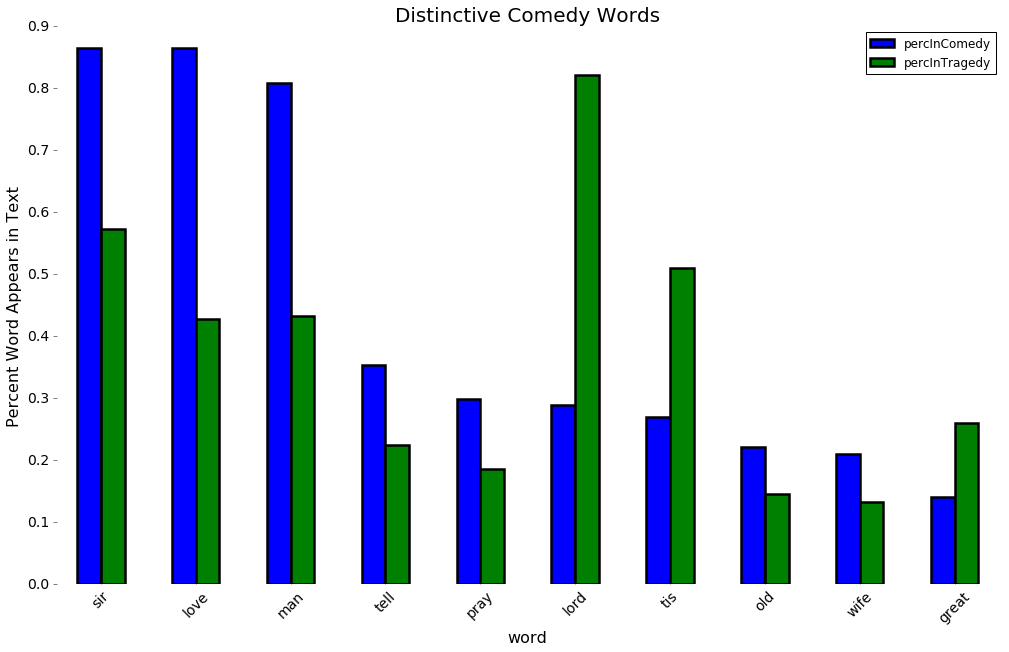

In [22]:
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
plt.figure(figsize=(17, 10))    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.set_title('Distinctive Comedy Words', fontsize= 20)
ax.set_ylabel('Percent Word Appears in Text', fontsize = 16)
ax.set_xlabel('Word', fontsize = 16)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

df = df.sort_values(by = 'percInComedy', ascending=0)
#sort by percInComedy - percInTragedy
#do a loc and plot that
df.plot(kind = 'bar', ax=ax, lw=2.5, rot=45)

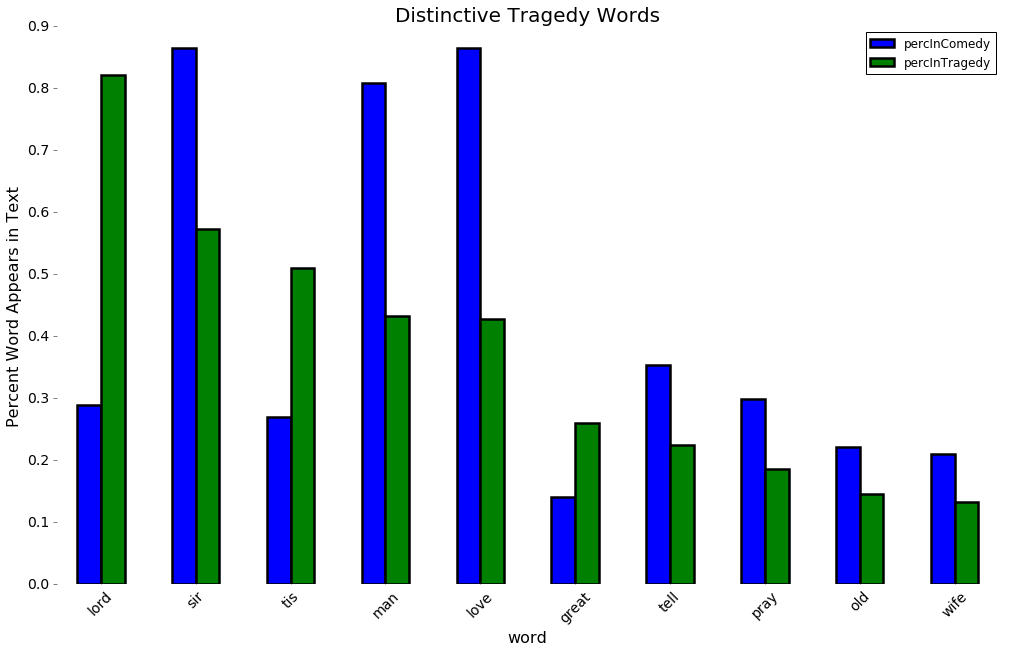

In [26]:
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
plt.figure(figsize=(17, 10))    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.set_title('Distinctive Tragedy Words', fontsize= 20)
ax.set_ylabel('Percent Word Appears in Text', fontsize = 16)
ax.set_xlabel('Word', fontsize = 16)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

df = df.sort_values(by = 'percInTragedy', ascending=0)
df.plot(kind = 'bar', ax=ax, lw=2.5, rot=45)